In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import sys, fileinput,re
from nltk.tokenize import sent_tokenize

### 데이터 로드

In [4]:
# 쇼핑몰 데이터
total_data = pd.read_table('./Train.txt', names =['ratings', 'reviews', 'label'])

print('전체 리뷰 개수: ', len(total_data))

전체 리뷰 개수:  200000


In [5]:
# 영화 데이터
total_data2 = pd.read_table('./ratings.txt', names =['num', 'reviews', 'label'])

print('전체 리뷰 개수: ', len(total_data2))

전체 리뷰 개수:  200000


In [6]:
# 스팀 데이터
total_data3 = pd.read_table('./steam.txt', names =['label', 'reviews'])

print('전체 리뷰 개수: ', len(total_data3))

전체 리뷰 개수:  100000


In [7]:
#상위 5개의 데이터 출력
total_data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,NaN
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,NaN
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,NaN
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,NaN
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,NaN


In [8]:
#상위 5개의 데이터 출력
total_data2 = total_data2.drop('num', axis=1)
total_data2

,reviews,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...
199995,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,쓰.레.기,0
199997,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [9]:
#상위 5개의 데이터 출력
total_data3

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


### 데이터 분리

In [10]:
#별점 4점 이상: 긍정(1), 그외: 부정(0)
def labeling(rating):
  if rating >= 4:
    return 1
  else:
    return 0

total_data['label'] = total_data['ratings'].apply(labeling)

In [11]:
# total_data

In [12]:
total_data = total_data.drop('ratings', axis=1)
total_data

,reviews,label
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...
199995,장마라그런가!!! 달지않아요,0
199996,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,넘이쁘고 쎄련되보이네요~,1


In [13]:
res = pd.concat([total_data, total_data2, total_data3])

In [14]:
# 중복 제거
res['reviews'].nunique(), res['label'].nunique()

(493987, 2)

In [15]:
res.drop_duplicates(subset=['reviews'], inplace=True)
print('총 샘플의 수 :',len(res))

총 샘플의 수 : 493988


In [29]:
#학습 및 검정 데이터 분리
train_data, val_data = train_test_split(res, test_size = 0.1, random_state = 11)

print('train :', len(train_data))
print('validation :', len(val_data))

train : 444589
validation : 49399


In [30]:
train_data

,reviews,label
77718,저희아버지가 좋아하시네요~,1
1206,조정이 어렵고 정확하지않아요,0
78931,음악이 너무 좋았습니다. 공감가는 내용도 많았고..,1
96434,재밌음 킬링타임 용으로 좋음(하균신 나와서 십점) 신하균 섹시해ㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠㅠ...,1
3295,5만원치고 노래가 너무 없음.,0
...,...,...
164107,배우가아깝다ㅜ에휴,0
3985,이 영화 대단하다!!!!,1
86050,야호! 항마력+10!,1
101544,아무런 감흥도 남지않는 허술함의 연속,0


### 전처리

In [31]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'] = train_data['reviews'].str.replace('^ +', "")
train_data['reviews'].replace('', np.nan, inplace=True)
train_data = train_data.dropna(how = 'any')

val_data['reviews'] = val_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
val_data['reviews'] = val_data['reviews'].str.replace('^ +', "")
val_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
val_data = val_data.dropna(how = 'any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(val_data))

C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


전처리 후 테스트용 샘플의 개수 : 49305


C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [23]:
import os

os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-19\bin\server'

In [58]:
from konlpy.tag import Okt

# 토큰화
# mecab = Mecab()
okt = Okt()
# print(okt.morphs('아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다'))

In [59]:
# 불용어 지정
stopwords = ['영화', '게임', '자', '도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '지', '임', '게', '하다', '로', '으', '잘', '걍', '좀']

In [23]:
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

val_data['tokenized'] = val_data['reviews'].apply(okt.morphs)
val_data['tokenized'] = val_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# 단어와 길이 분포 확인
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

# 부정
negative_word_count = Counter(negative_words)
print('부정\n', negative_word_count.most_common(20))

# 긍정
positive_word_count = Counter(positive_words)
print('\n긍정\n', positive_word_count.most_common(20))

부정
 [('너무', 25781), ('안', 23193), ('요', 17032), ('그냥', 16409), ('만', 15036), ('으로', 14693), ('못', 14138), ('하고', 11721), ('배송', 10966), ('에서', 10262), ('생각', 9946), ('별로', 9787), ('것', 9610), ('진짜', 9599), ('개', 9312), ('보다', 8965), ('나', 8942), ('거', 8560), ('했는데', 8450), ('적', 8133)]

긍정
 [('너무', 21305), ('좋아요', 18261), ('배송', 14684), ('으로', 13776), ('정말', 12398), ('요', 12374), ('생각', 10374), ('재구매', 10373), ('적', 10252), ('것', 10117), ('때', 9570), ('입니다', 9540), ('구매', 9406), ('만', 9341), ('에서', 9248), ('더', 8840), ('최고', 8807), ('하고', 8679), ('보다', 8668), ('안', 8242)]


In [25]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test = val_data['tokenized'].values
y_test = val_data['label'].values

In [57]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

NameError: name 'X_train' is not defined

In [27]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 211328
등장 빈도가 1번 이하인 희귀 단어의 수: 115349
단어 집합에서 희귀 단어의 비율: 54.58292322834646
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.2149331376264048


In [28]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 95981


In [29]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [32]:
print(X_train[:3])

[[1081, 1282, 4173], [3754, 2037, 19492, 356], [372, 2, 818, 660, 903, 118, 10452]]


In [33]:
print(X_test[:3])

[[4153, 2941, 952, 7731], [1, 6535, 1, 483, 20986, 131, 56, 55, 74, 63, 4343, 175], [1, 4117, 3374, 83, 466, 123, 2570, 72, 102, 176, 242, 41, 131, 243]]


리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 11.738318115120464


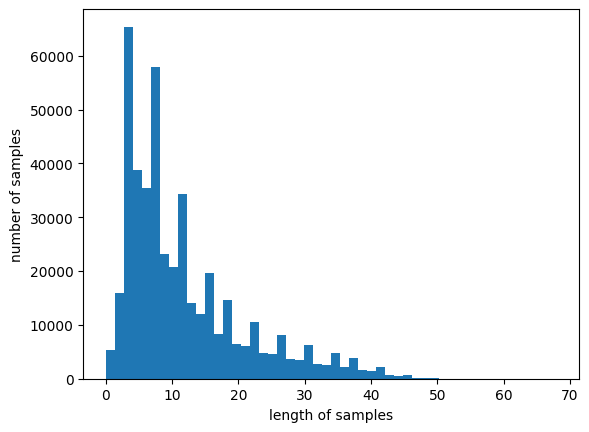

In [34]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [35]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [36]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 100.0


In [37]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### GRU

In [127]:
# from tensorflow.keras.layers import Embedding, Dense, GRU
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# embedding_dim = 100
# hidden_units = 128

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_dim))
# model.add(GRU(hidden_units))
# model.add(Dense(1, activation='sigmoid'))

# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
4426/4426 [==============================] - ETA: 0s - loss: 0.3306 - acc: 0.8595
Epoch 1: val_acc improved from -inf to 0.87641, saving model to best_model.h5
4426/4426 [==============================] - 183s 41ms/step - loss: 0.3306 - acc: 0.8595 - val_loss: 0.2985 - val_acc: 0.8764
Epoch 2/15
4426/4426 [==============================] - ETA: 0s - loss: 0.2692 - acc: 0.8929
Epoch 2: val_acc improved from 0.87641 to 0.88550, saving model to best_model.h5
4426/4426 [==============================] - 179s 41ms/step - loss: 0.2692 - acc: 0.8929 - val_loss: 0.2808 - val_acc: 0.8855
Epoch 3/15
4425/4426 [============================>.] - ETA: 0s - loss: 0.2433 - acc: 0.9057
Epoch 3: val_acc improved from 0.88550 to 0.88756, saving model to best_model.h5
4426/4426 [==============================] - 179s 40ms/step - loss: 0.2432 - acc: 0.9057 - val_loss: 0.2799 - val_acc: 0.8876
Epoch 4/15
4425/4426 [============================>.] - ETA: 0s - loss: 0.2268 - acc: 0.9132
Epoch 4: v

In [40]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(256,return_sequences = True))
model.add(GRU(256,return_sequences = True))
model.add(GRU(256,return_sequences = False))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_l3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
5546/5546 [==============================] - ETA: 0s - loss: 0.3660 - acc: 0.8389
Epoch 1: val_acc improved from -inf to 0.84760, saving model to GRU_l3.h5
5546/5546 [==============================] - 1055s 189ms/step - loss: 0.3660 - acc: 0.8389 - val_loss: 0.3516 - val_acc: 0.8476
Epoch 2/15
5546/5546 [==============================] - ETA: 0s - loss: 0.3048 - acc: 0.8753
Epoch 2: val_acc improved from 0.84760 to 0.86578, saving model to GRU_l3.h5
5546/5546 [==============================] - 1041s 188ms/step - loss: 0.3048 - acc: 0.8753 - val_loss: 0.3172 - val_acc: 0.8658
Epoch 3/15
5546/5546 [==============================] - ETA: 0s - loss: 0.2732 - acc: 0.8910
Epoch 3: val_acc improved from 0.86578 to 0.86594, saving model to GRU_l3.h5
5546/5546 [==============================] - 1041s 188ms/step - loss: 0.2732 - acc: 0.8910 - val_loss: 0.3151 - val_acc: 0.8659
Epoch 4/15
5546/5546 [==============================] - ETA: 0s - loss: 0.2535 - acc: 0.8999
Epoch 4: val_acc

In [41]:
loaded_model = load_model('GRU_l3.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1541/1541 [==============================] - 54s 35ms/step - loss: 0.3142 - acc: 0.8672

 테스트 정확도: 0.8672


In [42]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [50]:
sentiment_predict('으악 너무 굳')

1/1 [==============================] - 0s 21ms/step
92.40% 확률로 긍정 리뷰입니다.


### LSTM

In [46]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('model_LSTM.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2789 - acc: 0.8933
Epoch 1: val_acc improved from -inf to 0.90865, saving model to model_LSTM.h5
2000/2000 [==============================] - 80s 39ms/step - loss: 0.2789 - acc: 0.8933 - val_loss: 0.2443 - val_acc: 0.9086
Epoch 2/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2237 - acc: 0.9190
Epoch 2: val_acc improved from 0.90865 to 0.91399, saving model to model_LSTM.h5
2000/2000 [==============================] - 78s 39ms/step - loss: 0.2237 - acc: 0.9190 - val_loss: 0.2338 - val_acc: 0.9140
Epoch 3/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2056 - acc: 0.9267
Epoch 3: val_acc improved from 0.91399 to 0.91821, saving model to model_LSTM.h5
2000/2000 [==============================] - 79s 40ms/step - loss: 0.2057 - acc: 0.9267 - val_loss: 0.2234 - val_acc: 0.9182
Epoch 4/15
2000/2000 [==============================] - ETA: 0s - loss: 0.1909 - acc: 0.9331
Epoch 4: val_

In [47]:
loaded_model = load_model('model_LSTM.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1250/1250 [==============================] - 10s 8ms/step - loss: 0.2194 - acc: 0.9195

 테스트 정확도: 0.9195


In [56]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(256,return_sequences = True))
model.add(LSTM(256,return_sequences = False))
# model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('model_LSTM111.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

NameError: name 'vocab_size' is not defined

In [31]:
loaded_model = load_model('model_LSTM111.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

NameError: name 'X_test' is not defined

In [216]:
sentiment_predict('으악 좋네요')

1/1 [==============================] - 0s 18ms/step
87.46% 확률로 긍정 리뷰입니다.


### Predict

In [41]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model_LSTM.h5')

In [42]:
data = []
test_csv = pd.read_excel('./test_data.xlsx')
test_csv['text']

0       오늘 도착해서 바로 먹어봤네요~괴산이 고향이라 고향의 과일을 먹으니 더 맛있네요 많...
1       앱 깔고 지웠다만 세번째네요. 처음에는 앱 구동 시 튕기면서 계속 꺼졌고, 앱을 새...
2                              이거 완전 재밌게봤는데..평점 왜이리 낮음??ㅠ
3       영국 거리를 활보 하고 다니면서 마차로 동네 파괴하고 다니는게임 노가다 수집요소만 ...
4       괴산대학찰옥수수는 정말 맛있어요 씹으면톡톡 터지는 그맛은 찰지고  맛있어서 자꾸자꾸...
                              ...                        
997                   멀 말하고자하는지 아직도 이해가....공포도 아니여서 실망;ㅁ;
998     캐시관련 이벤트 관련 미지급이 매우 많고 문의를 해도 동문서답이 많음 뽑기권은 제대...
999     잘 보고있긴한데 점점 갈수록 짜지는거같아요;; 처음에는 걍 만화 3편보면 100캐시...
1000    여자 친구와 제주도로 첫 여행을 가게되어 숙소를 어디로 예약할 지 고민하다가 이왕하...
1001    추억의 게임 ㅎㅎ 데모로만 플레이해봤는데 다시 해보니 너무 재밌어요 스타처럼 3종족...
Name: text, Length: 1002, dtype: object

In [ ]:
new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
      
new_sentence = okt.morphs(new_sentence, stem=True)

new_sentence = [word for word in new_sentence if not word in stopwords]

#       total_cnt = len(tokenizer.word_index) 
#       vocab_size = total_cnt - rare_cnt + 2
#       tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')

encoded = tokenizer.texts_to_sequences([new_sentence])
print(encoded)
pad_new = pad_sequences(encoded, maxlen = 80)

score = float(loaded_model.predict(pad_new))
if(score > 0.5):
    return 1
else:
    return 0
    

In [43]:
# predict result로 제출 csv 작성
# pred = []
submission = pd.read_csv("./제출용.csv")
# submission["Answer"] = pred

submission["Answer"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Answer, Length: 1000, dtype: float64

In [65]:
def sentiment_predict(new_sentence):
      
      new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
      
      new_sentence = okt.morphs(new_sentence, stem=True)
      
      new_sentence = [word for word in new_sentence if not word in stopwords]
      
#       total_cnt = len(tokenizer.word_index) 
#       vocab_size = total_cnt - rare_cnt + 2
#       tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
        
      encoded = tokenizer.texts_to_sequences([new_sentence])
      print(encoded)
      pad_new = pad_sequences(encoded, maxlen = 80)

      score = float(loaded_model.predict(pad_new))
      if(score > 0.5):
        return 1
      else:
        return 0
    
   
    
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

AttributeError: 'int' object has no attribute 'lower'

In [53]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = 80)

    score = float(loaded_model.predict(pad_new))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
#     if(score > 0.5):
#         return 1
#     else:
#         return 0

    #   a=loaded_model.predict(pad_new)
    print(a)
    #   if(score > 0.5):
    #         return 1
    #   else:
    #         return 0


In [55]:
# tokenizer = Tokenizer(num_words = 100)
# tokenizer.fit_on_texts(sentences)
# word_index = tokenizer.word_index

# sequences = tokenizer.texts_to_sequences(sentences)
# submission['Answer'] = test_csv['text'].apply(sentiment_predict)
sentiment_predict('넘 굿')

1/1 [==============================] - 0s 11ms/step
75.40% 확률로 부정 리뷰입니다.


NameError: name 'a' is not defined

In [48]:
submission['Answer']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Answer, Length: 1000, dtype: float64

In [68]:
submission.to_csv('제출용1.csv', index = False)